In [1]:
import pandas as pd
import re

In [2]:
df = pd.read_csv('train_data.csv')

In [3]:
df.to_csv('financial_tweets.csv' , index = False)

In [4]:
df

,text,label
0,Here are Thursday's biggest analyst calls: App...,0
1,Buy Las Vegas Sands as travel to Singapore bui...,0
2,"Piper Sandler downgrades DocuSign to sell, cit...",0
3,"Analysts react to Tesla's latest earnings, bre...",0
4,Netflix and its peers are set for a ‘return to...,0
...,...,...
16985,KfW credit line for Uniper could be raised to ...,3
16986,KfW credit line for Uniper could be raised to ...,3
16987,Russian https://t.co/R0iPhyo5p7 sells 1 bln r...,3
16988,Global ESG bond issuance posts H1 dip as supra...,3


In [5]:
def clean_text(text):
 text = re.sub(r'http\S+| www\S+|http\S+' , '' , text, flags = re.MULTILINE)
 text = re.sub(r' \@\w+|\#' , '' , text)
 text = re.sub(r'[^\w\s]' , '' , text) 
 text = re.sub(r' \ d+' , '' , text)
 text = text.lower()
 return text

In [6]:
df['clean_text'] = df['text'].apply(clean_text)
print(df.head(20))

                                                 text  label  \
0   Here are Thursday's biggest analyst calls: App...      0   
1   Buy Las Vegas Sands as travel to Singapore bui...      0   
2   Piper Sandler downgrades DocuSign to sell, cit...      0   
3   Analysts react to Tesla's latest earnings, bre...      0   
4   Netflix and its peers are set for a ‘return to...      0   
5   Barclays believes earnings for these underperf...      0   
6   Bernstein upgrades Alibaba, says shares can ra...      0   
7   Analysts react to Netflix's strong quarter, wi...      0   
8   Buy Chevron as shares look attractive at these...      0   
9   Morgan Stanley says these global stocks are se...      0   
10  Investing Club: Analysts dropped a bunch of ne...      0   
11  CFRA downgrades Disney, says lack of cash divi...      0   
12  Bank of America is more bullish than JPMorgan....      0   
13  Here are Tuesday's biggest analyst calls: Meta...      0   
14  Citi cuts Microsoft price target, ci

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Mokshat p shah\AppData\Local\Temp\ipykernel_29148\2413823266.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df , x = 'label' , palette = 'viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

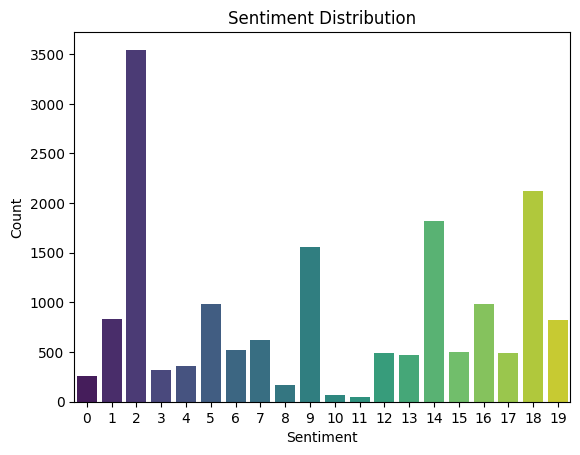

In [8]:
sns.countplot(data = df , x = 'label' , palette = 'viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show

In [10]:
from wordcloud import WordCloud
text = ' '. join(df['clean_text'])
wordcloud = WordCloud(width = 800 , height = 400 , background_color = 'white').generate(text)

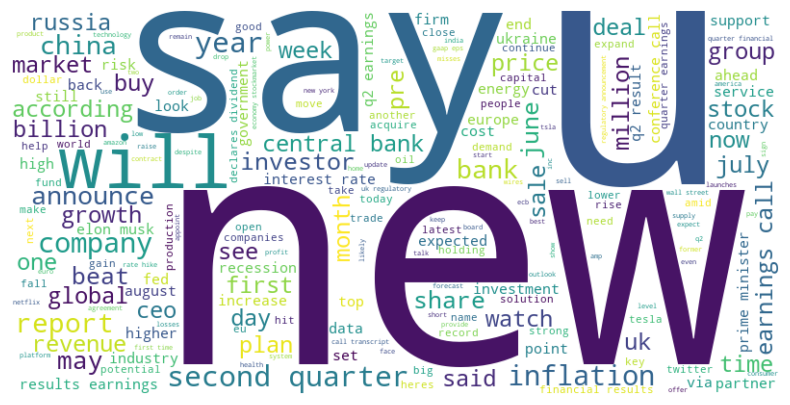

In [11]:
plt.figure(figsize= (10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['label']


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.86      0.37      0.51        49
           1       0.83      0.72      0.77       193
           2       0.67      0.90      0.77       690
           3       0.97      0.41      0.58        73
           4       1.00      0.84      0.91        80
           5       0.93      0.87      0.90       205
           6       0.84      0.66      0.74       107
           7       0.97      0.77      0.86       125
           8       0.92      0.37      0.52        30
           9       0.63      0.70      0.67       319
          10       1.00      0.16      0.27        19
          11       1.00      0.12      0.22         8
          12       0.93      0.67      0.78        93
          13       0.92      0.46      0.61        96
          14       0.73      0.81      0.77       366
          15       0.88      0.66      0.75        90
          16       0.88      0.84      0.86       169
          17       0.94    

In [17]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_test , y_pred)
rmse = np.sqrt(mse)
print("RMSE:" , rmse)

RMSE: 4.83202237773956


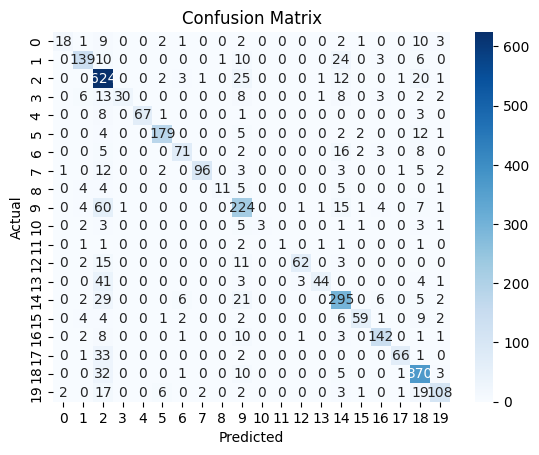

In [18]:
import seaborn as sns
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True, fmt='d' , cmap='Blues' , xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [19]:
import joblib
joblib.dump(model, 'model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']